## Advanced Data Visualization
### Matplotlib -- 3d plot
### Seaborn -- Regression Plot, Box Plot, Violin Plot, Swarm Plot
### Bokeh -- Interactive Scatter plot with zoom and color, grid plot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing_header = ["HomeID", "HomeAge", "HomeSqft", "LotSize", "BedRooms", 
                  "HighSchoolAPI", "ProxFwy", "CarGarage", "ZipCode", "HomePriceK"]

In [3]:
df = pd.read_csv("fixed-housing-data.csv",names=housing_header)

In [4]:
df.describe()

HomeID     HomeAge     HomeSqft      LotSize   BedRooms  \
count  100.000000  100.000000   100.000000   100.000000  100.00000   
mean    50.500000   17.200000  1615.280000  7840.500000    2.71000   
std     29.011492    4.925711   231.759719  1046.107306    0.71485   
min      1.000000   10.000000  1215.000000  6056.000000    2.00000   
25%     25.750000   12.750000  1411.500000  7024.250000    2.00000   
50%     50.500000   17.000000  1606.500000  7822.000000    3.00000   
75%     75.250000   21.250000  1836.000000  8839.250000    3.00000   
max    100.000000   25.000000  1994.000000  9476.000000    4.00000   

       HighSchoolAPI     ProxFwy   CarGarage       ZipCode   HomePriceK  
count     100.000000  100.000000  100.000000    100.000000   100.000000  
mean      904.430000    3.100000    1.520000  94559.250000  1080.990000  
std        36.337713    0.758787    1.234848    475.816351   146.533583  
min       850.000000    2.000000    0.000000  94085.000000   809.000000  
25%       875.750000    3.000000    0.000000  94086.500000   940.000000  
50%       900.500000    3.000000    2.000000  94550.500000  1100.000000  
75%       936.000000    4.000000    3.000000  95023.250000  1191.000000  
max       975.000000    4.000000    3.000000  95051.000000  1336.000000

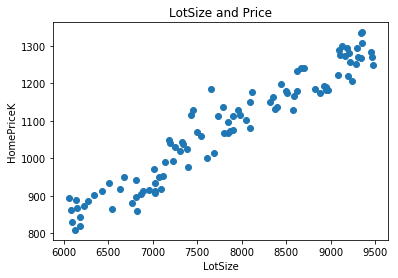

In [5]:
plt.title("LotSize and Price") 
plt.xlabel("LotSize") 
plt.ylabel("HomePriceK") 
plt.scatter(df['LotSize'],df['HomePriceK'])
plt.show()

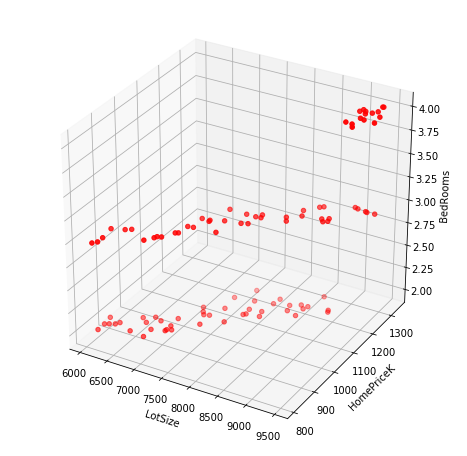

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['LotSize'],df['HomePriceK'],df['BedRooms'], c='r', marker='o')
ax.set_xlabel('LotSize')
ax.set_ylabel('HomePriceK')
ax.set_zlabel('BedRooms')

plt.show()

In [7]:
import seaborn as sns
sns.set(style="darkgrid")
current_palette = sns.color_palette("bright")
# sns.palplot("bright")

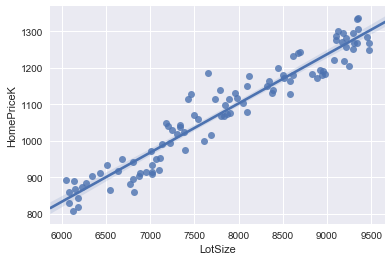

In [8]:
sns.regplot(x="LotSize",y="HomePriceK",data=df)

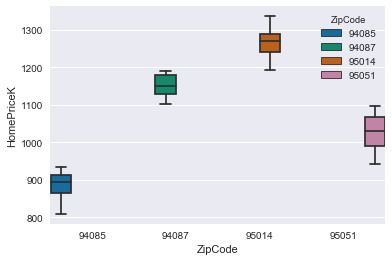

In [9]:
sns.boxplot(x="ZipCode", y="HomePriceK", hue="ZipCode",data=df, palette="colorblind",width=1)

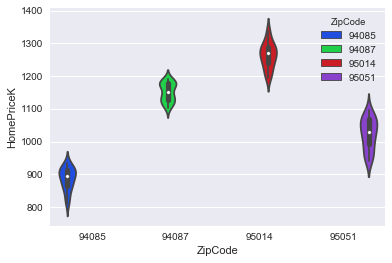

In [10]:
# violin plot shows data density distribution
sns.violinplot(x="ZipCode", y="HomePriceK", hue="ZipCode",data=df, palette="bright")

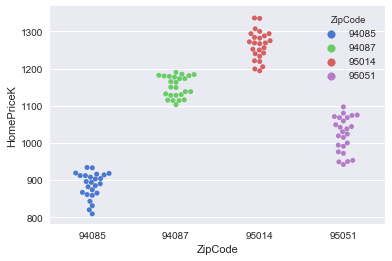

In [11]:
# swarm plot slightly adjust position of dots so that they don't overlap
sns.swarmplot(x="ZipCode", y="HomePriceK", hue="ZipCode", data=df,palette="muted")

In [ ]:
# D3 is data-driven documention, a javascript library, need to know HTML
# Bokeh is simplier than D3

In [12]:
import bokeh
print(bokeh.__version__)

0.12.16


In [13]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [14]:
p = figure(plot_width=600, plot_height=400)
p.xaxis.axis_label = "Lot Size"
p.yaxis.axis_label = "Home Price K"
p.circle('LotSize', 'HomePriceK',size=5, source=df)
show(p)

In [15]:
from bokeh.transform import linear_cmap

In [16]:
# dots are color-coded by # of bedrooms, size is pixel size of dot
# the 0,5 are color parameters
# low (float) – a minimum value of the range to map into the palette. Values below this are clamped to low.
# high (float) – a maximum value of the range to map into the palette. Values above this are clamped to high.
p = figure(plot_width=600, plot_height=400)
p.xaxis.axis_label = "Lot Size"
p.yaxis.axis_label = "Home Price K"
p.circle('LotSize', 'HomePriceK',size=5, color=linear_cmap('BedRooms', 'Viridis256', 0, 5),source=df)
show(p)

In [17]:
from bokeh.layouts import gridplot

In [18]:
# x = list(range(11))
# y0, y1, y2 = x, [10-i for i in x], [abs(i-5) for i in x]

plot_options = dict(width=250, plot_height=250, tools='pan,wheel_zoom')

# create a new plot
s1 = figure(**plot_options)
s1.yaxis.axis_label = "LotSize"
s1.xaxis.axis_label = "Home Price K"
s1.circle(df['HomePriceK'], df['LotSize'],size=10, color="navy")

# create a new plot and share both ranges
s2 = figure(x_range=s1.x_range, y_range=s1.y_range, **plot_options)
s2.yaxis.axis_label = "HomeSqft"
s2.xaxis.axis_label = "Home Price K"
s2.triangle(df['HomePriceK'], df['HomeSqft'],size=10, color="firebrick")

# create a new plot and share only one range
s3 = figure(x_range=s1.x_range, **plot_options)
s3.yaxis.axis_label = "ZipCode"
s3.xaxis.axis_label = "Home Price K"
s3.square(df['HomePriceK'],df['ZipCode'], size=10, color="olive")

p = gridplot([[s1, s2, s3]])

# show the results
show(p)